## Análise Exploratória de Dados do df(P41A)

### **Tópicos**
1. Introdução;
2. Obtendo dados;
3. Exploração de dados;
4. Analise dos dados;
5. Visualização;
6. Análise Estatística.

---

## 1. Introdução

- Este projeto foi desenvolvido no âmbito da disciplina Machine Learning N01, sob a orientação do professor Izaac Alencar, como requisito parcial para a conclusão do curso. O principal objetivo é realizar uma análise exploratória de dados a partir do dataset P41A - World Happiness Report, fornecido pelo professor.

- O conjunto de dados contém informações sobre os níveis de felicidade em diversos países ao redor do mundo, com base em variáveis socioeconômicas e subjetivas, tais como: PIB per capita, suporte social, expectativa de vida saudável, liberdade para fazer escolhas de vida, generosidade, e percepção de corrupção. A partir dessas variáveis, o relatório calcula uma pontuação agregada de felicidade (Score), permitindo comparações entre as nações.

- A análise desenvolvida neste projeto tem como foco:
1. Compreender a distribuição das variáveis que compõem o índice de felicidade;
2. Identificar correlações entre os indicadores;
3. Investigar a presença de outliers;
4. Analisar as disparidades regionais por meio de mapas geográficos;
5. Levantar hipóteses sobre fatores não mensurados diretamente no modelo, como o clima, eventos históricos e culturais.

- Com base nessa análise, pretende-se não apenas entender os determinantes estatísticos da felicidade, mas também refletir sobre a interpretação desses dados e suas limitações.

O relatório calcula a pontuação de felicidade (Score) com base em variáveis:

- PIB per capita (GDP per capita)

- Suporte social (Social support)

- Expectativa de vida saudável (Healthy life expectancy)

- Liberdade para fazer escolhas de vida (Freedom)

- Generosidade (Generosity)

- Percepção de corrupção (Perceptions of corruption)

Bibliotecas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from scipy import stats

## 2. Obtendo dados

In [2]:
df = pd.read_excel("p41a.xlsx")

In [3]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## 3. Exploração de dados

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


- O conjunto de dados utilizado neste projeto é composto por 156 observações e 9 variáveis, sendo elas uma combinação de variáveis quantitativas e qualitativas. A única variável qualitativa é "Country or region", que representa os países ou regiões analisados, classificada como uma variável qualitativa nominal. A variável "Overall rank", apesar de ser numérica, é do tipo quantitativa discreta, pois representa a posição no ranking de felicidade e assume apenas valores inteiros. As demais variáveis — "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity" e "Perceptions of corruption" — são todas classificadas como variáveis quantitativas contínuas, uma vez que representam medições que podem assumir uma ampla gama de valores reais.

In [4]:
print(f'Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas')

Dataset tem 156 linhas e 9 colunas


- Nesse pesquisa foram incluidos 159 países do mundo de 193 ou 195, dependendo se são membros da ONU ou não.

In [ ]:
print(df.isnull().sum())
print(df.values.any())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
True


- Não há valores faltantes


In [ ]:
print(df.duplicated().sum())

0


- Não valores duplicados

## 4. Analise dos dados

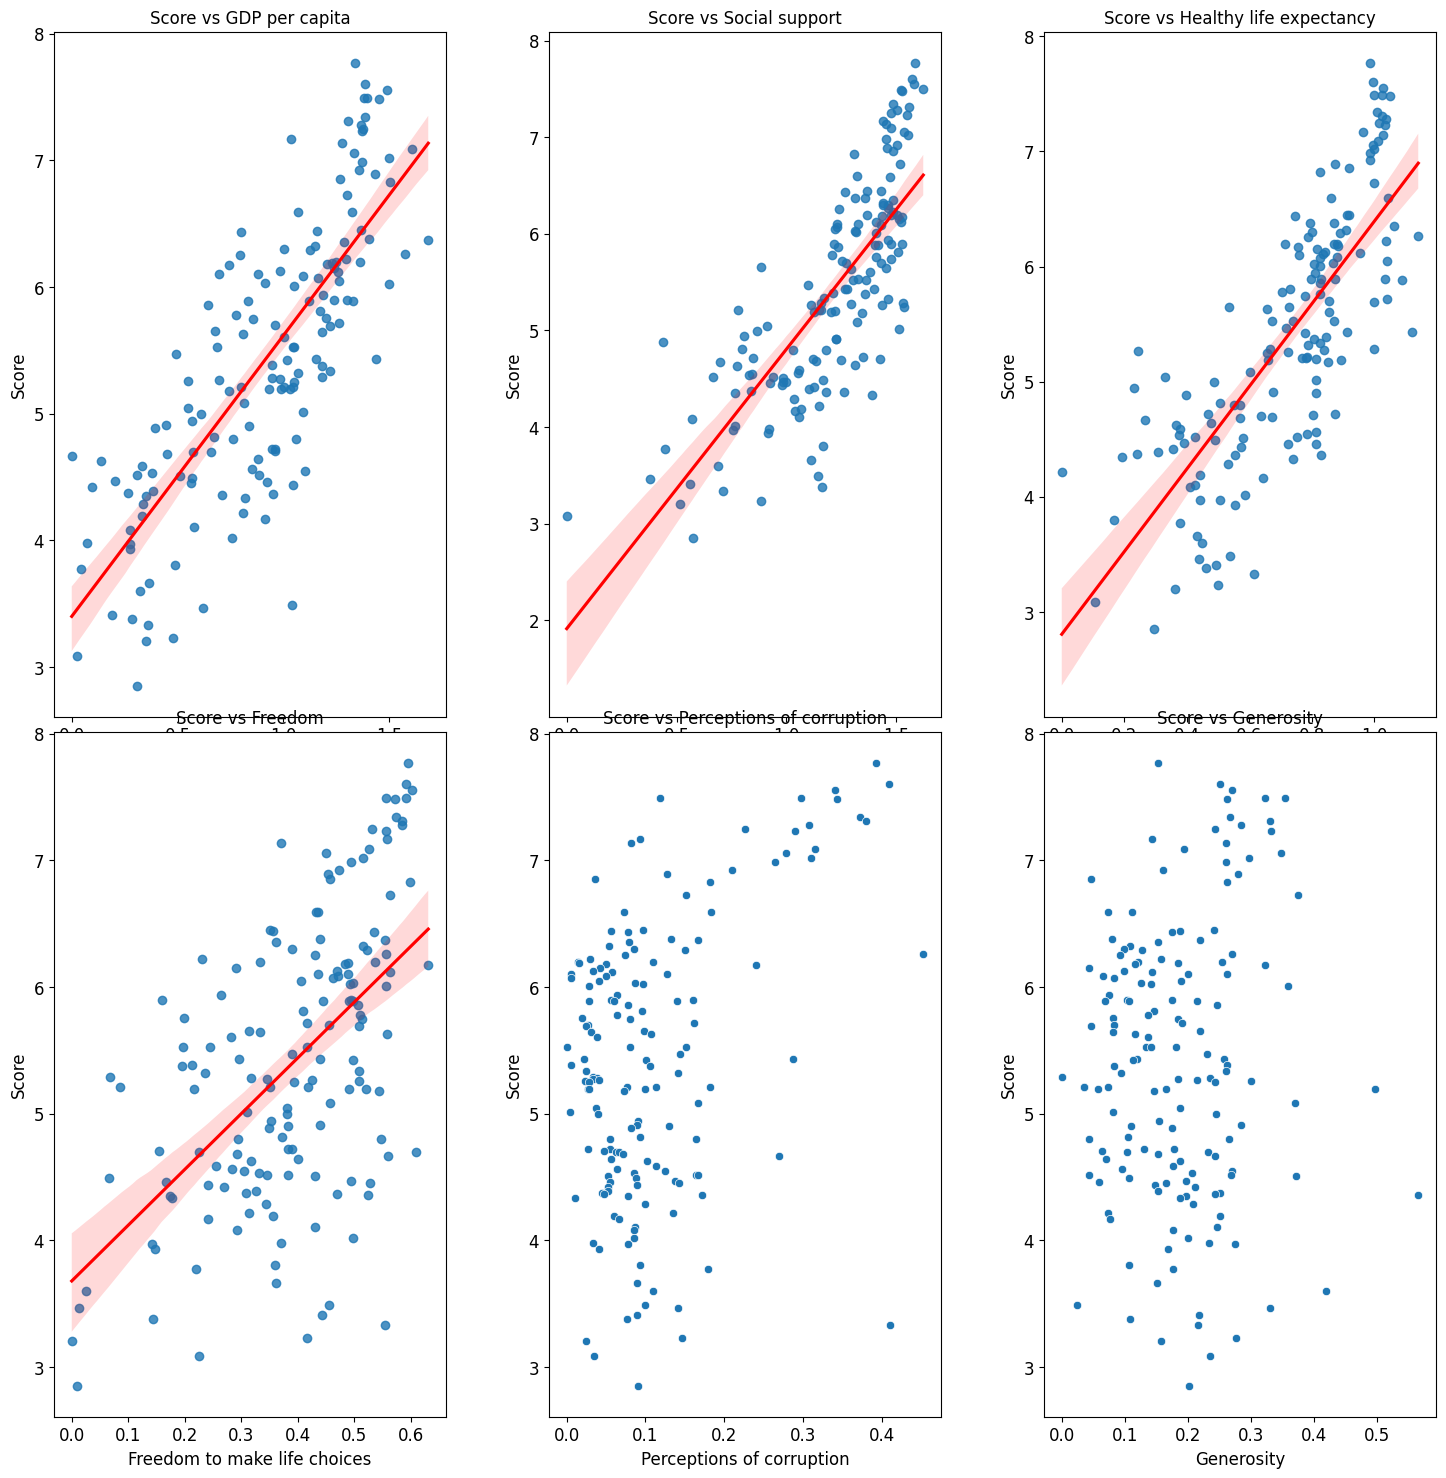

In [8]:
# Cria a figura principal
fig = plt.figure(figsize=(15, 14))  # Tamanho total ajustado

# Divide em duas subfiguras
topfig, bottomfig = fig.subfigures(2, 1)

# Parte de cima com 3 gráficos de regressão
axes_top = topfig.subplots(1, 3)
topfig.subplots_adjust(left=0.1, right=0.9, wspace=0.4, hspace=0.4)

sns.regplot(ax=axes_top[0], data=df, x='GDP per capita', y='Score', line_kws={'color': 'r'})
sns.regplot(ax=axes_top[1], data=df, x='Social support', y='Score', line_kws={'color': 'r'})
sns.regplot(ax=axes_top[2], data=df, x='Healthy life expectancy', y='Score', line_kws={'color': 'r'})

axes_top[0].set_title('Score vs GDP per capita', fontsize=12)
axes_top[1].set_title('Score vs Social support', fontsize=12)
axes_top[2].set_title('Score vs Healthy life expectancy', fontsize=12)

for ax, xlabel in zip(axes_top, ['GDP per capita', 'Social support', 'Healthy life expectancy']):
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.tick_params(labelsize=12)

# Parte de baixo com 3 gráficos
axes_bottom = bottomfig.subplots(1, 3)
bottomfig.subplots_adjust(left=0.1, right=0.9, wspace=0.4, hspace=0.4)

sns.regplot(ax=axes_bottom[0], data=df, x='Freedom to make life choices', y='Score', line_kws={'color': 'r'})
sns.scatterplot(ax=axes_bottom[1], data=df, x='Perceptions of corruption', y='Score')
sns.scatterplot(ax=axes_bottom[2], data=df, x='Generosity', y='Score')

axes_bottom[0].set_title('Score vs Freedom', fontsize=12)
axes_bottom[1].set_title('Score vs Perceptions of corruption', fontsize=12)
axes_bottom[2].set_title('Score vs Generosity', fontsize=12)

for ax, xlabel in zip(axes_bottom, ['Freedom to make life choices', 'Perceptions of corruption', 'Generosity']):
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

- Em alguns casos, observa-se uma correlação linear positiva entre a pontuação de felicidade e variáveis como PIB per capita, suporte social, expectativa de vida saudável e liberdade de escolha. No entanto, nos dois últimos gráficos — generosidade e percepção de corrupção — não há uma correlação aparente, ou, quando existe, é bastante fraca. Isso se deve à forte concentração dos dados em valores baixos, o que limita a variabilidade necessária para uma relação linear mais evidente.

Referencia: [analise-de-correlacao](https://analisemacro.com.br/econometria-e-machine-learning/analise-de-correlacao-em-estatistica/?authuser=0)

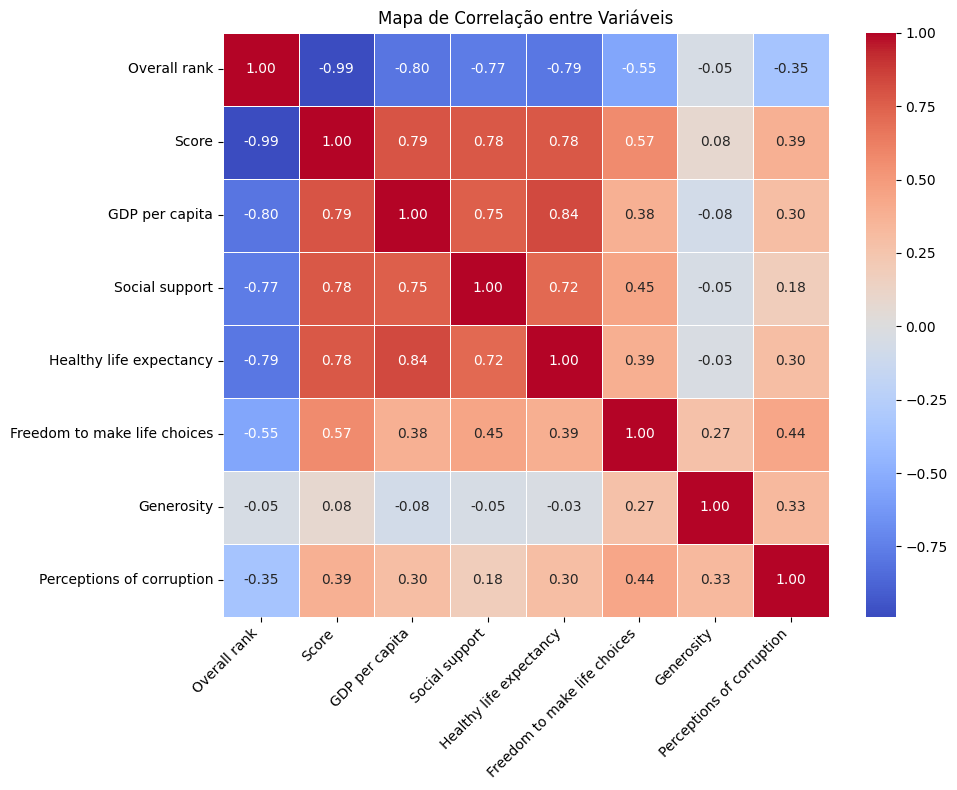

In [9]:
# Calcular a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Mapa de Correlação entre Variáveis')

# Ajustar rotação e alinhamento dos rótulos do eixo
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- O gráfico de calor revela algumas correlações positivas marcantes, como entre expectativa de vida saudável e economia, e também entre suporte social (família) e economia. Por outro lado, alguns resultados são surpreendentes — como a correlação quase nula entre economia e generosidade, sugerindo que a generosidade pode ser uma característica mais cultural ou pessoal, e não necessariamente ligada à riqueza de um país. Além disso, observa-se que as variáveis generosidade e percepção de corrupção possuem baixa correlação com a pontuação de felicidade, reforçando o que foi percebido nos gráficos anteriores.

- A variável "Freedom to make life choices" tem uma correlação de 0.57 com a pontuação de felicidade, indicando uma relação moderadamente forte. Isso sugere que, em média, países onde as pessoas sentem que têm liberdade para tomar decisões importantes sobre suas vidas tendem a ser mais felizes. No entanto, como essa variável não apresenta correlações tão fortes com outras variáveis (como PIB per capita ou suporte social), podemos concluir que a liberdade percebida é um fator relativamente independente, mas ainda importante para o bem-estar subjetivo das populações.

## 5. Visualização

### Top 10 Países mais Felizes
---

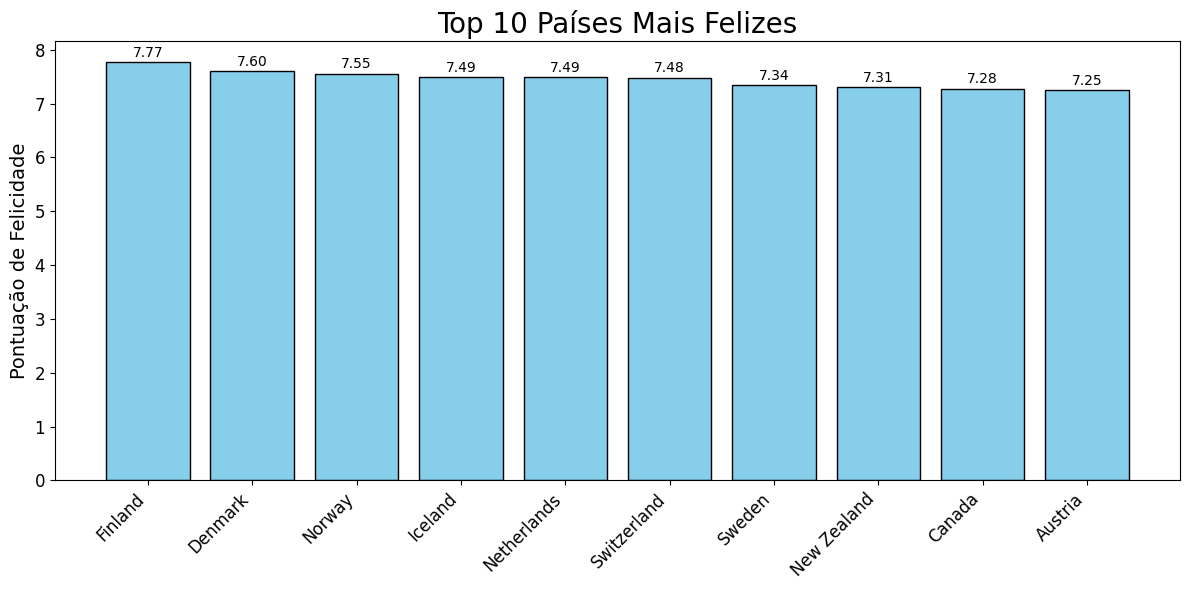

In [18]:
# Ordenar os países pelo Score de felicidade e pegar os 10 primeiros
top10_happy = df.sort_values(by='Score', ascending=False).head(10)

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_happy['Country or region'], top10_happy['Score'], color='skyblue', edgecolor='black')

# Título e rótulos
plt.title('Top 10 Países Mais Felizes', fontsize=20)
plt.ylabel('Pontuação de Felicidade', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adicionar o valor acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

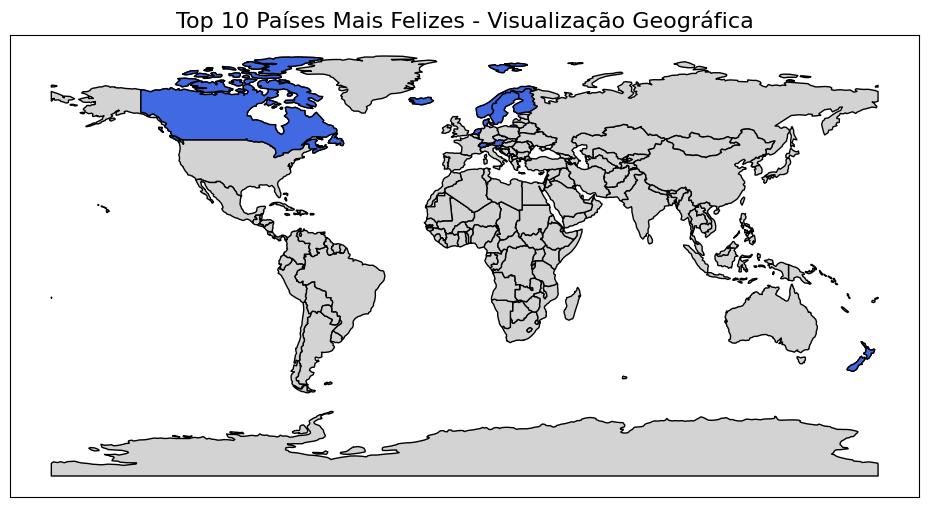

In [19]:
# Baixar o conjunto de dados atualizado do Natural Earth
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Lista dos 10 países mais felizes
top10_countries = ["Finland", "Denmark", "Norway", "Iceland", "Netherlands",
                   "Switzerland", "Sweden", "New Zealand", "Canada", "Austria"]

# Criar uma nova coluna para destacar os países mais felizes
world['happiest'] = world['NAME'].apply(lambda x: 'Top 10' if x in top10_countries else 'Other')

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')  # Mapa base
world[world['happiest'] == 'Top 10'].plot(ax=ax, color='royalblue', edgecolor='black')  # Países mais felizes

# Título e ajustes
plt.title("Top 10 Países Mais Felizes - Visualização Geográfica", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel("")

plt.show()

- 8 dos 10 países mais felizes estão na Europa.

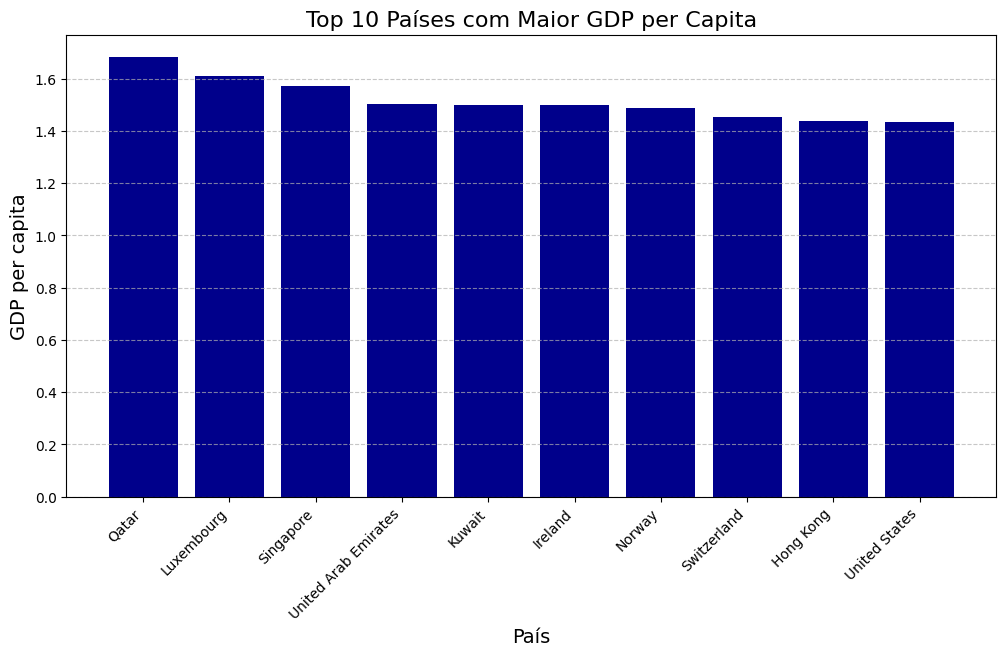

In [20]:
# Ordenar o DataFrame pelo GDP per capita e selecionar os 10 maiores
top10_gdp = df.sort_values(by="GDP per capita", ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top10_gdp["Country or region"], top10_gdp["GDP per capita"], color="darkblue")

# Ajustes no gráfico
plt.xlabel("País", fontsize=14)
plt.ylabel("GDP per capita", fontsize=14)
plt.title("Top 10 Países com Maior GDP per Capita", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotacionar os nomes dos países para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

In [21]:
# Selecionar os 10 países com maior GDP per capita
top10_gdp = df.sort_values(by="GDP per capita", ascending=False).head(10)["Country or region"]

# Lista dos 10 países mais felizes
top10_happy = ["Finland", "Denmark", "Norway", "Iceland", "Netherlands",
               "Switzerland", "Sweden", "New Zealand", "Canada", "Austria"]

# Encontrar os países que estão em ambos os rankings
common_countries = set(top10_gdp) & set(top10_happy)

# Printar os países em comum
print("Países que estão no Top 10 de GDP per capita e no Top 10 de Felicidade:")
print(list(common_countries))

Países que estão no Top 10 de GDP per capita e no Top 10 de Felicidade:
['Norway', 'Switzerland']


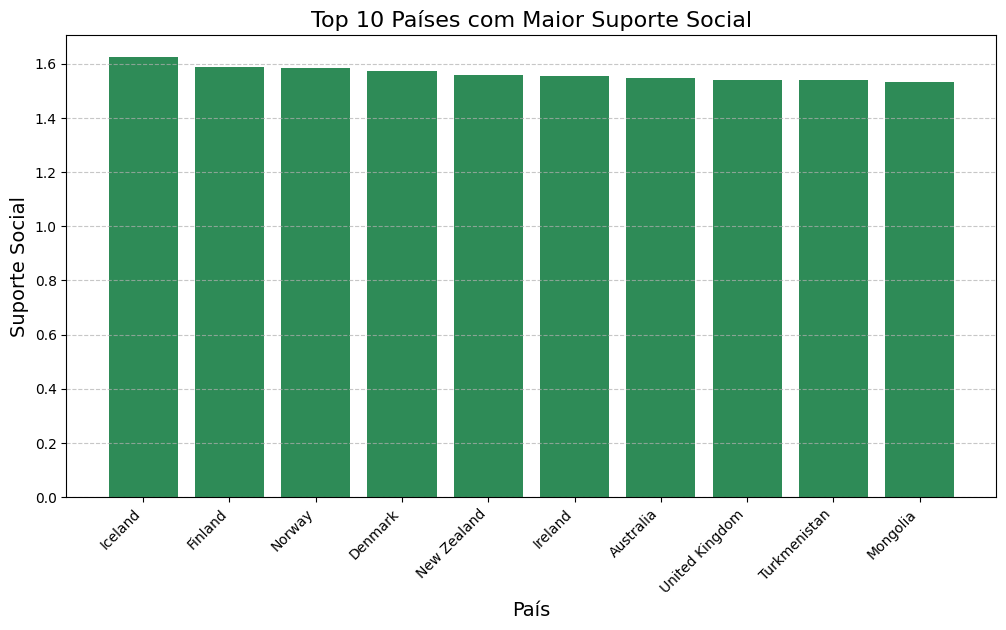

In [22]:
# Ordenar o DataFrame pelo Social support e selecionar os 10 maiores
top10_social = df.sort_values(by="Social support", ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top10_social["Country or region"], top10_social["Social support"], color="seagreen")

# Ajustes no gráfico
plt.xlabel("País", fontsize=14)
plt.ylabel("Suporte Social", fontsize=14)
plt.title("Top 10 Países com Maior Suporte Social", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

In [23]:
top10_social = df.sort_values(by="Social support", ascending=False).head(10)["Country or region"]

# Lista dos 10 países mais felizes (como definido anteriormente)
top10_happy = ["Finland", "Denmark", "Norway", "Iceland", "Netherlands",
               "Switzerland", "Sweden", "New Zealand", "Canada", "Austria"]

# Encontrar os países que estão nos dois rankings
common_social_happy = set(top10_social) & set(top10_happy)

# Exibir os países em comum
print("Países que estão no Top 10 de Suporte Social e no Top 10 de Felicidade:")
print(list(common_social_happy))

Países que estão no Top 10 de Suporte Social e no Top 10 de Felicidade:
['Finland', 'Norway', 'Iceland', 'New Zealand', 'Denmark']


- Apesar de o PIB per capita ser frequentemente associado à qualidade de vida, apenas 2 dos 10 países com maior GDP per capita aparecem entre os 10 mais felizes.
Por outro lado, 5 dos 10 países com maior suporte social estão presentes no grupo dos países mais felizes.

- Esse resultado reforça a ideia de que fatores sociais, como apoio entre indivíduos e políticas públicas de suporte à população, podem ter um impacto mais direto na percepção de felicidade do que apenas a renda média.

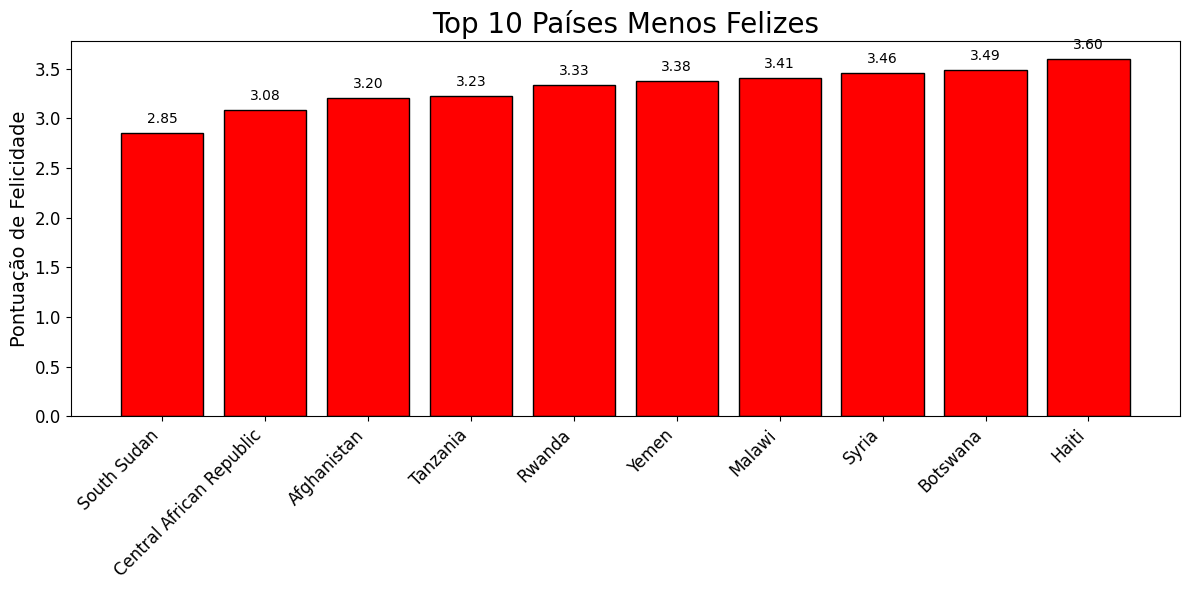

In [24]:
# Ordenar os países pelo Score de felicidade e pegar os 10 últimos
bottom10_happy = df.sort_values(by='Score', ascending=True).head(10)

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom10_happy['Country or region'], bottom10_happy['Score'], color='red', edgecolor='black')

# Título e rótulos
plt.title('Top 10 Países Menos Felizes', fontsize=20)
plt.ylabel('Pontuação de Felicidade', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adicionar o valor acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

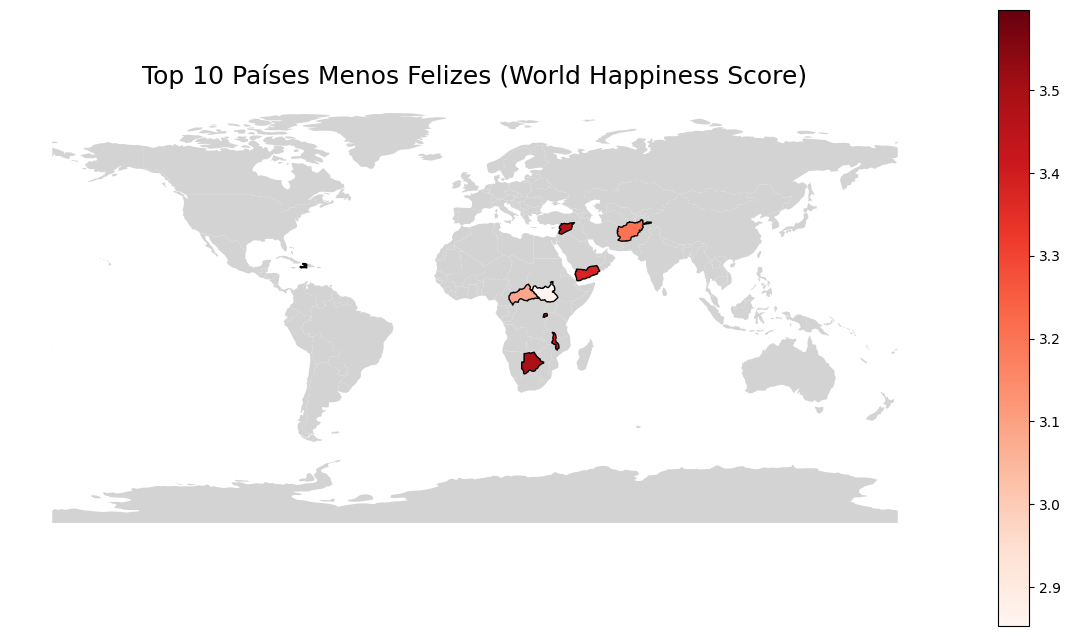

In [25]:
# Carrega o mapa base do mundo usando o Natural Earth via GeoPandas
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Padroniza o nome da coluna para merge
world = world.rename(columns={'ADMIN': 'Country or region'})

# Seleciona os 10 países menos felizes
bottom10 = df.sort_values(by='Score').head(10)

# Faz o merge entre o mapa e os dados
map_data = world.merge(bottom10, on='Country or region', how='inner')

# Plota o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='lightgrey')
map_data.plot(ax=ax, column='Score', cmap='Reds', legend=True, edgecolor='black')

# Adiciona título
plt.title('Top 10 Países Menos Felizes (World Happiness Score)', fontsize=18)
plt.axis('off')

# Exibe
plt.show()

- A maioria dos países com os menores índices de felicidade — como South Sudan, Central African Republic, Tanzania, Rwanda, Malawi e Botswana — está localizada no continente africano.
Essa concentração pode estar relacionada a fatores como instabilidade política, baixo desenvolvimento econômico, acesso limitado a serviços de saúde etc...

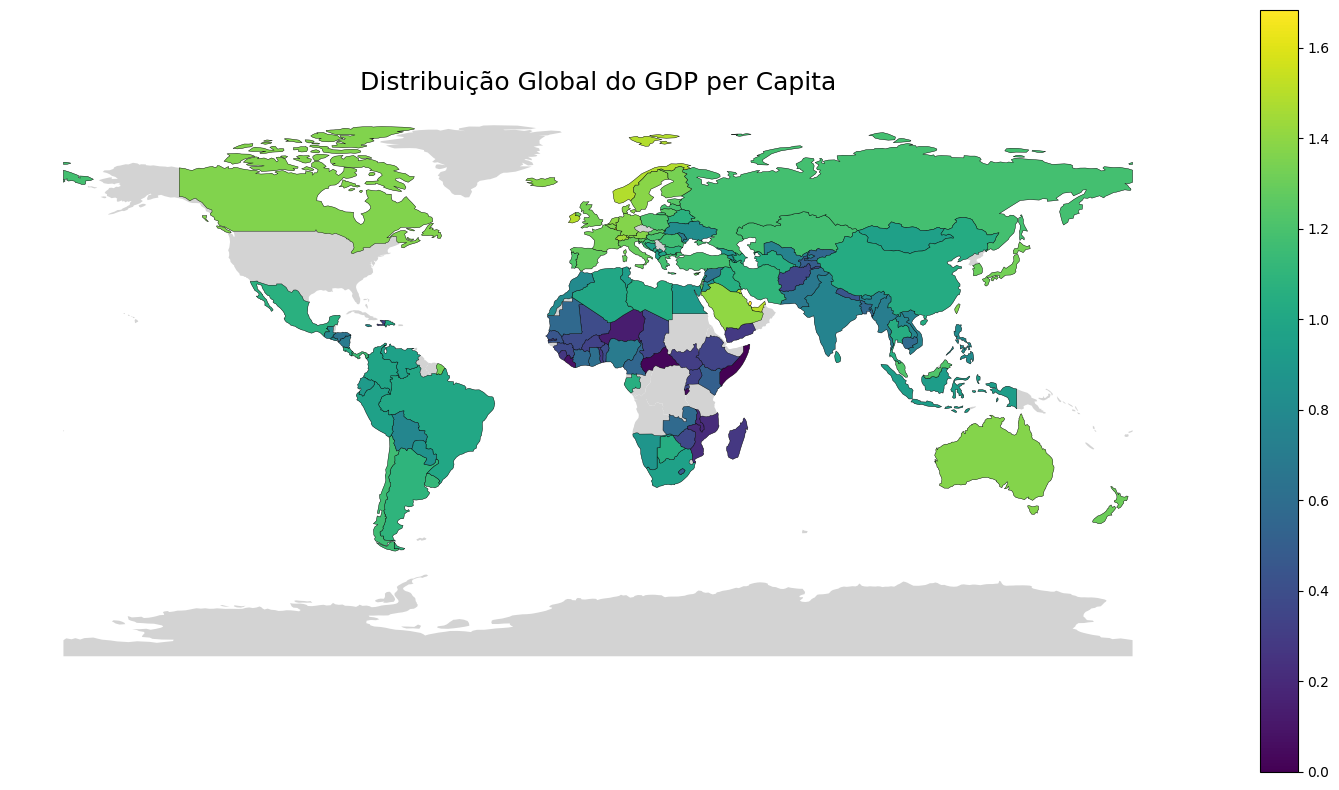

In [26]:
# Carrega o mapa base (GeoJSON)
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Padroniza o nome da coluna para combinar com seu DataFrame
world = world.rename(columns={'ADMIN': 'Country or region'})

# Faz o merge
map_data = world.merge(df[['Country or region', 'GDP per capita']], on='Country or region', how='left')

# Cria o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='lightgrey')  # mapa de fundo cinza claro
map_data.dropna(subset=['GDP per capita']).plot(
    ax=ax,
    column='GDP per capita',
    cmap='viridis',
    legend=True,
    edgecolor='black',
    linewidth=0.3
)

# Título e ajustes
plt.title('Distribuição Global do GDP per Capita', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

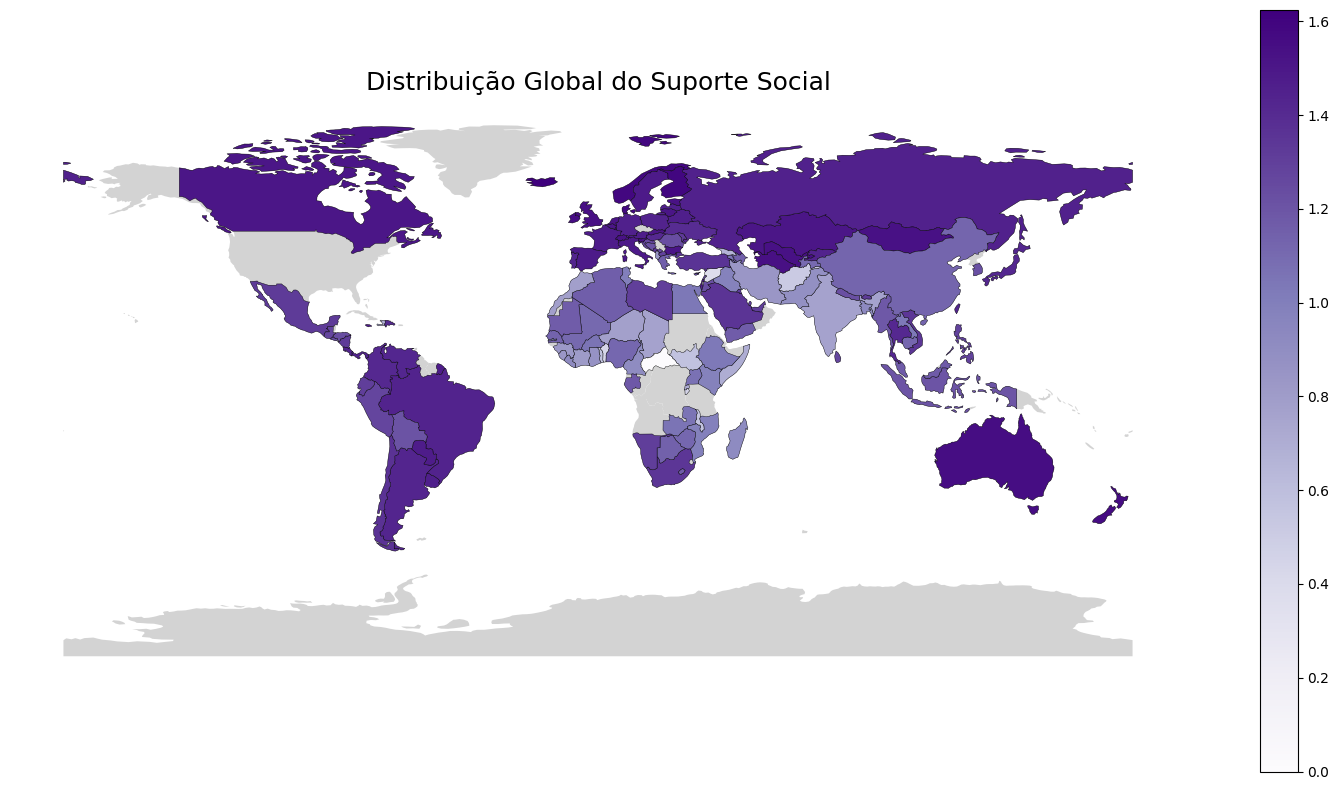

In [27]:
# Merge do DataFrame do mapa com os dados de suporte social
map_data_social = world.merge(df[['Country or region', 'Social support']],
                              on='Country or region',
                              how='left')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='lightgrey')

map_data_social.dropna(subset=['Social support']).plot(
    ax=ax,
    column='Social support',
    cmap='Purples',
    legend=True,
    edgecolor='black',
    linewidth=0.3
)

plt.title('Distribuição Global do Suporte Social', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


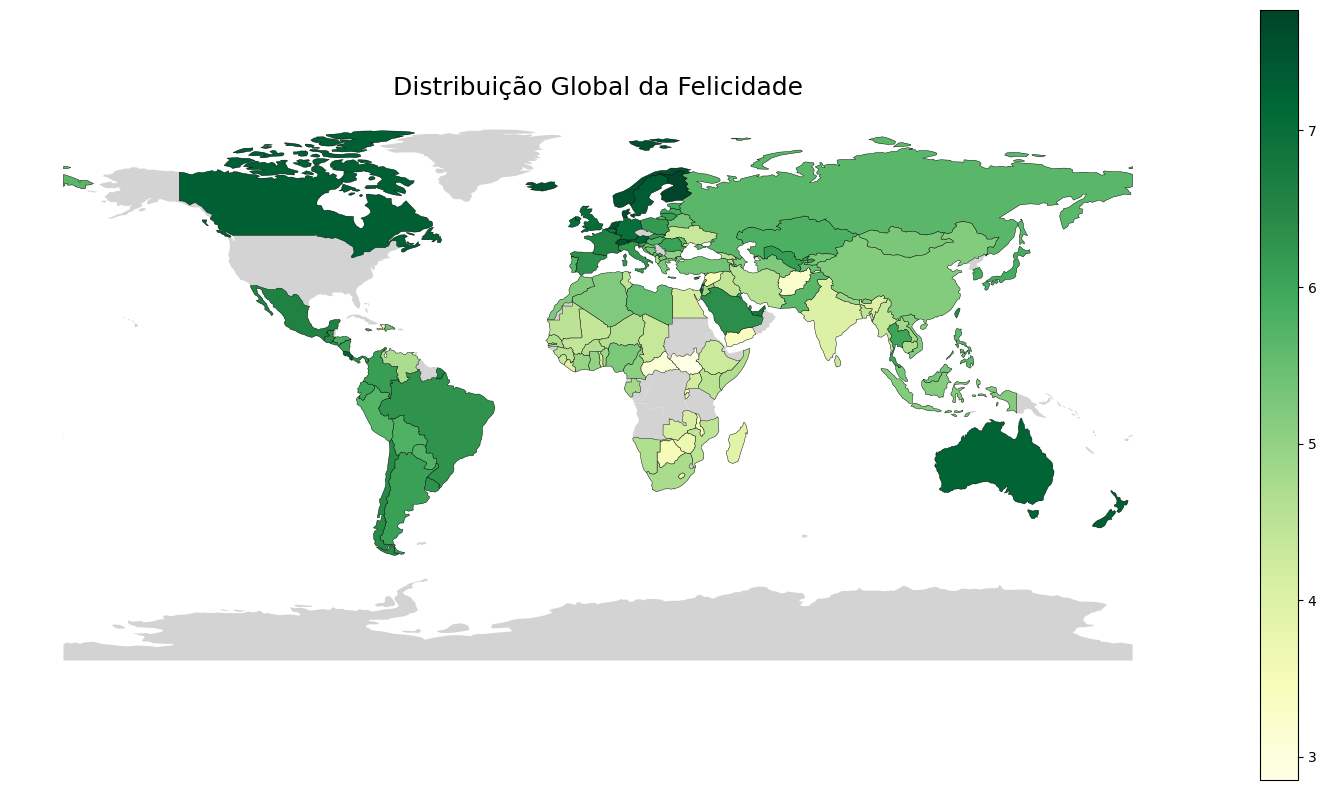

In [28]:
# Merge com o score de felicidade
map_data_happiness = world.merge(df[['Country or region', 'Score']],
                                 on='Country or region',
                                 how='left')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='lightgrey')

map_data_happiness.dropna(subset=['Score']).plot(
    ax=ax,
    column='Score',
    cmap='YlGn',
    legend=True,
    edgecolor='black',
    linewidth=0.3
)

plt.title('Distribuição Global da Felicidade', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

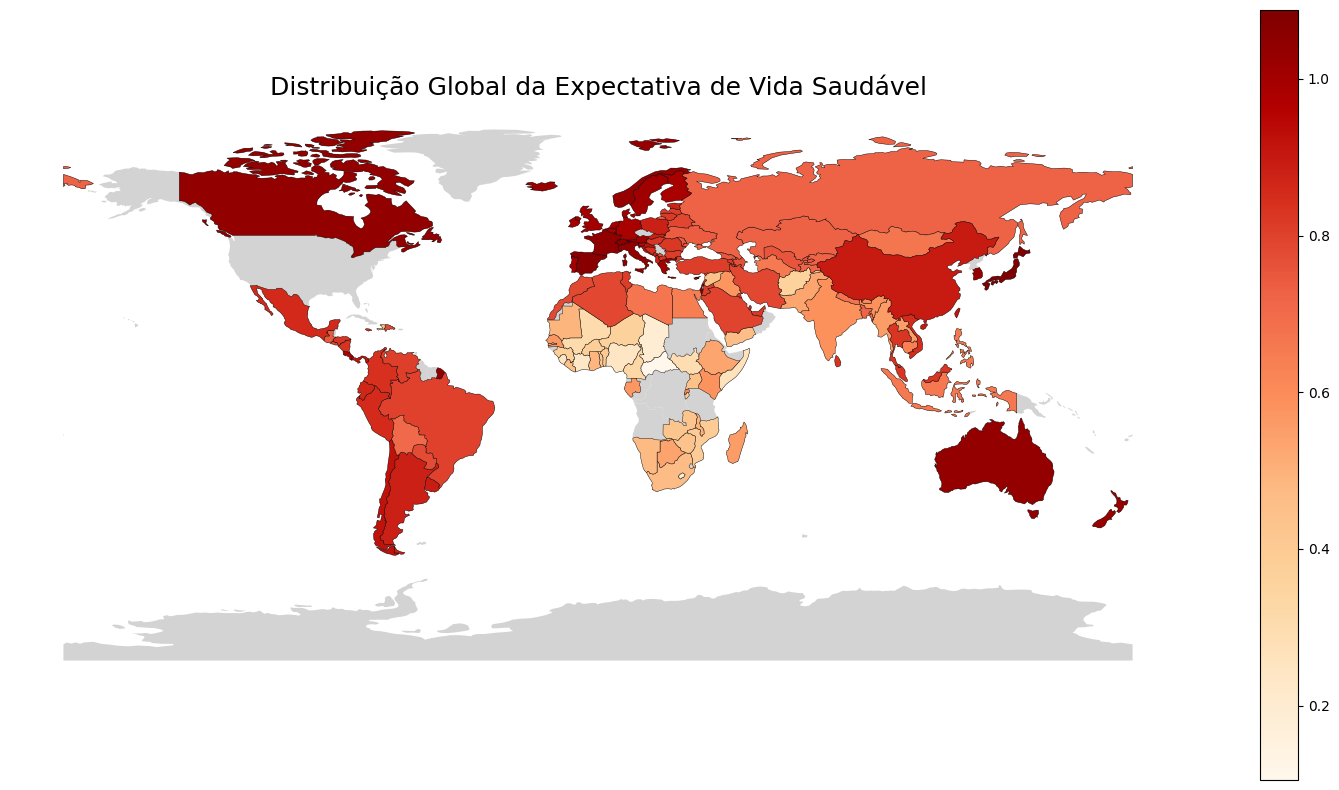

In [29]:
# Merge com a expectativa de vida saudável
map_data_health = world.merge(df[['Country or region', 'Healthy life expectancy']],
                              on='Country or region',
                              how='left')

# Plot do mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='lightgrey')

map_data_health.dropna(subset=['Healthy life expectancy']).plot(
    ax=ax,
    column='Healthy life expectancy',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.3
)

plt.title('Distribuição Global da Expectativa de Vida Saudável', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

- Apesar de a pontuação de felicidade não ser uma medida objetiva como o PIB, e estar sujeita a interpretações e possíveis vieses culturais ou momentâneos, a análise visual dos dados revelou padrões relevantes. Fatores como PIB per capita, suporte social e expectativa de vida saudável apresentaram forte correlação positiva com a pontuação de felicidade, indicando que esses elementos são determinantes significativos para o bem-estar das populações.

- Por outro lado, variáveis como generosidade e percepção de corrupção apresentaram correlação fraca ou inexistente com o índice de felicidade, sugerindo que, embora importantes em outros contextos, não exercem influência direta na satisfação geral com a vida.

- Curiosamente, o fator “liberdade para tomar decisões sobre a própria vida” apresentou uma correlação moderada (0.57), sugerindo que o sentimento de autonomia pessoal é um pilar importante, mas não isolado, da felicidade. Este é um dado que merece destaque, pois reforça a ideia de que liberdade individual, mesmo sem riqueza extrema, pode contribuir substancialmente para o bem-estar.

- Geograficamente, os países nórdicos europeus, como Finlândia, Dinamarca, Noruega e Islândia, estão entre os mais felizes do mundo. Essas nações compartilham características como alto desenvolvimento humano, forte rede de suporte social e instituições confiáveis, o que sugere que o modelo de estado de bem-estar social influencia significativamente os níveis de felicidade. Em contrapartida, os países menos felizes, em sua maioria africanos ou afetados por conflitos armados, enfrentam sérias dificuldades socioeconômicas, o que se reflete nos baixos índices de satisfação populacional.

- Em suma, mesmo considerando as limitações de mensuração da felicidade, a análise permite identificar fatores estruturais e sociais que contribuem de forma decisiva para o bem-estar populacional, oferecendo subsídios para políticas públicas voltadas à melhoria da qualidade de vida.

## 6. Análise Estatística


In [10]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


- GDP per capita apresenta média de 0.91, com um valor máximo de 1.68. Isso indica que, embora alguns países tenham níveis muito elevados de renda per capita, há uma dispersão considerável entre os países.

- Social support possui média de 1.21, sendo um dos fatores com maior valor absoluto, sugerindo forte presença desse aspecto na percepção de felicidade.

- Healthy life expectancy tem média de 0.73 com baixa dispersão (desvio padrão de 0.24), o que sugere uma distribuição relativamente uniforme entre os países.

- Freedom to make life choices apresenta média de 0.39, com valores variando entre 0 e 0.63, o que denota uma grande variação na percepção de liberdade entre os países.

- Generosity tem média de 0.18, com valor máximo de 0.57, o que mostra que embora seja um valor baixo no geral, alguns países se destacam consideravelmente.

- Perceptions of corruption apresenta a menor média (0.11) e uma dispersão pequena, o que sugere que a corrupção é percebida como um problema global comum, com poucos países se destacando de forma positiva.

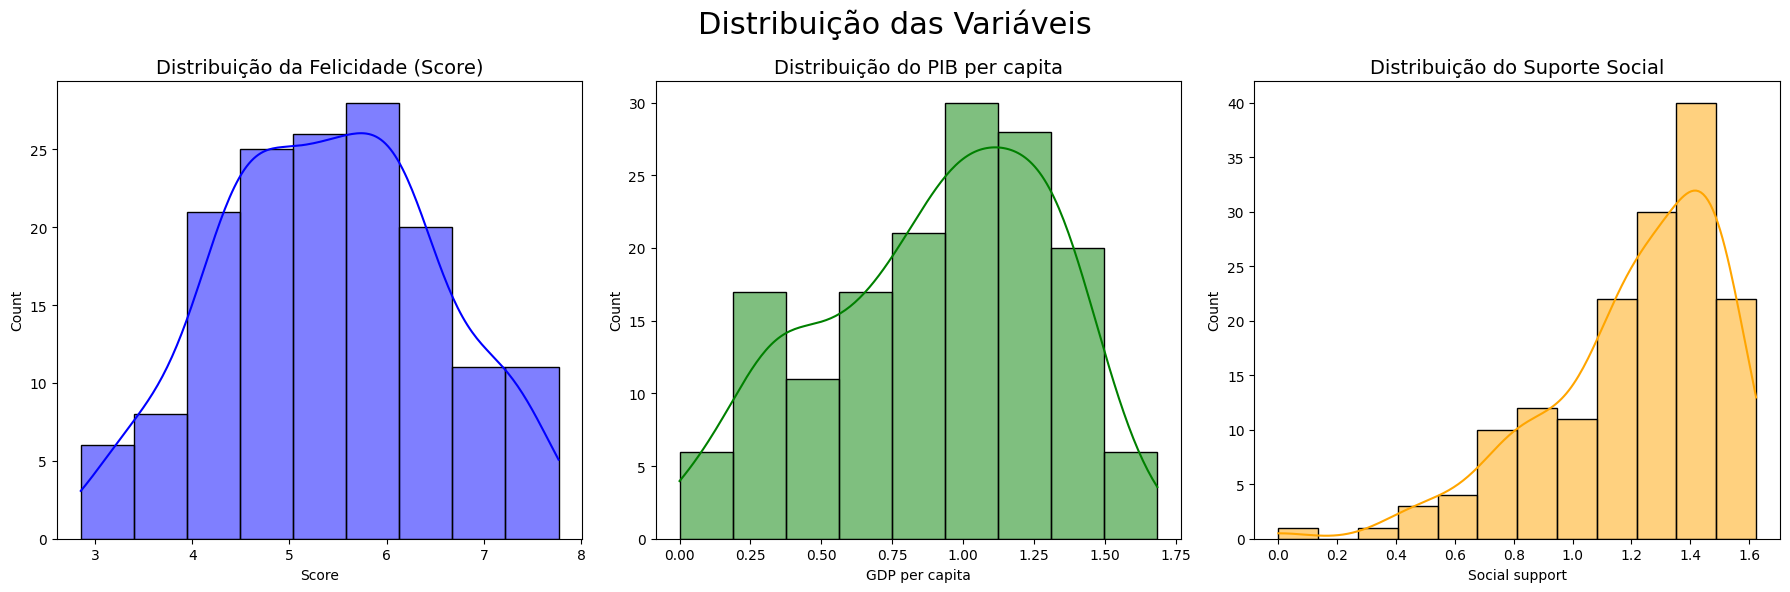

In [11]:
# Criando a figura com 3 subplots lado a lado
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

# Histograma com densidade para Score
sns.histplot(df['Score'], kde=True, color='blue', ax=ax1)
ax1.set_title('Distribuição da Felicidade (Score)', fontsize=14)

# Histograma com densidade para GDP per capita
sns.histplot(df['GDP per capita'], kde=True, color='green', ax=ax2)
ax2.set_title('Distribuição do PIB per capita', fontsize=14)

# Histograma com densidade para Social support
sns.histplot(df['Social support'], kde=True, color='orange', ax=ax3)
ax3.set_title('Distribuição do Suporte Social', fontsize=14)

# Título geral
fig.suptitle("Distribuição das Variáveis", fontsize=22)

plt.tight_layout()
plt.show()

- Nenhuma das distribuições acima é uma gaussiana 'perfeita'. Em particular, a terceira ('Suporte Social') é fortemente enviesada para a esquerdan revelando que a maioria dos países apresenta níveis elevados de suporte social, enquanto poucos têm pontuações baixas nesse aspecto.

Referencia:[assimetria-e-curtose](//https://www.blog.psicometriaonline.com.br/assimetria-e-curtose-um-guia-completo/?authuser=1)

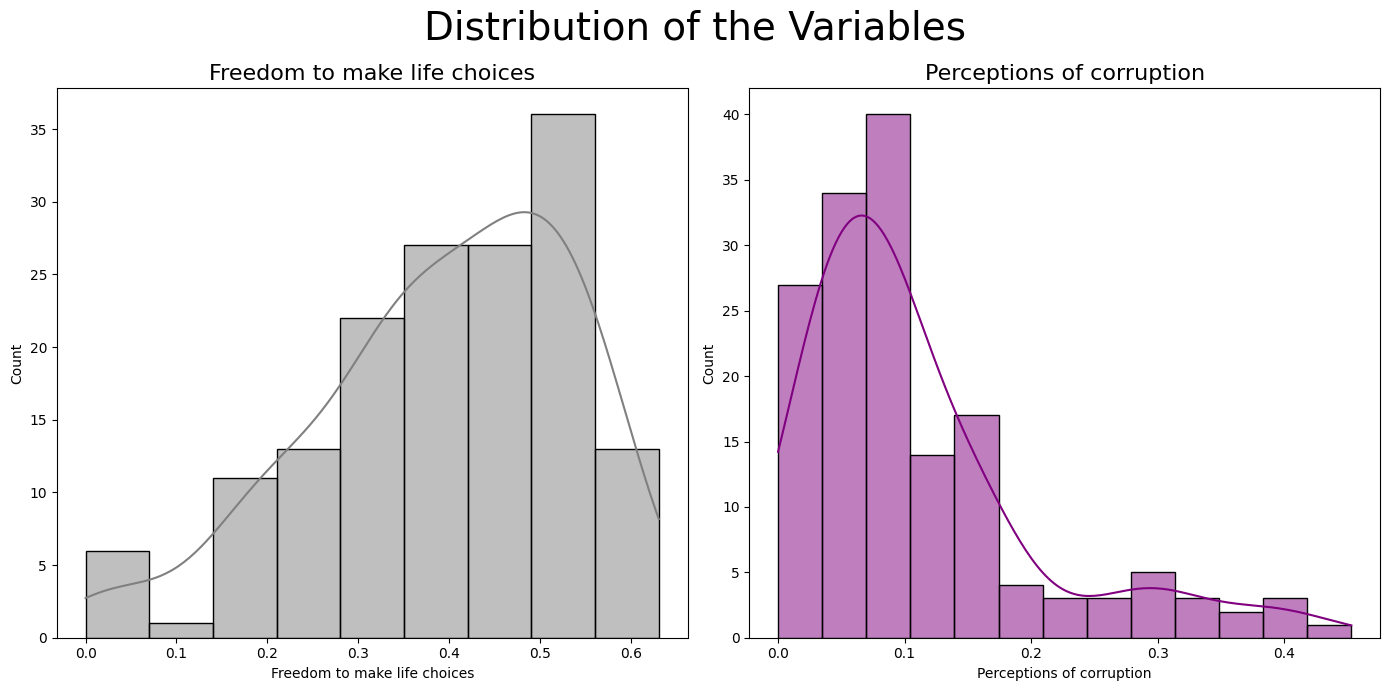

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 7))

ax1 = sns.histplot(df['Freedom to make life choices'], kde=True, color='grey', ax=ax1)
ax1.set_title("Freedom to make life choices", fontsize=16)

ax2 = sns.histplot(df['Perceptions of corruption'], kde=True, color='purple', ax=ax2)
ax2.set_title("Perceptions of corruption", fontsize=16)

fig.suptitle("Distribution of the Variables", fontsize=28)
plt.tight_layout()
plt.show()

- Novamente, temos distribuições distorcidas. Em particular, a variável Perceptions of corruption é claramente assimétrica à direita, indicando que valores baixos predominam. Isso significa que, globalmente, a maioria das pessoas não confia em seus governos.

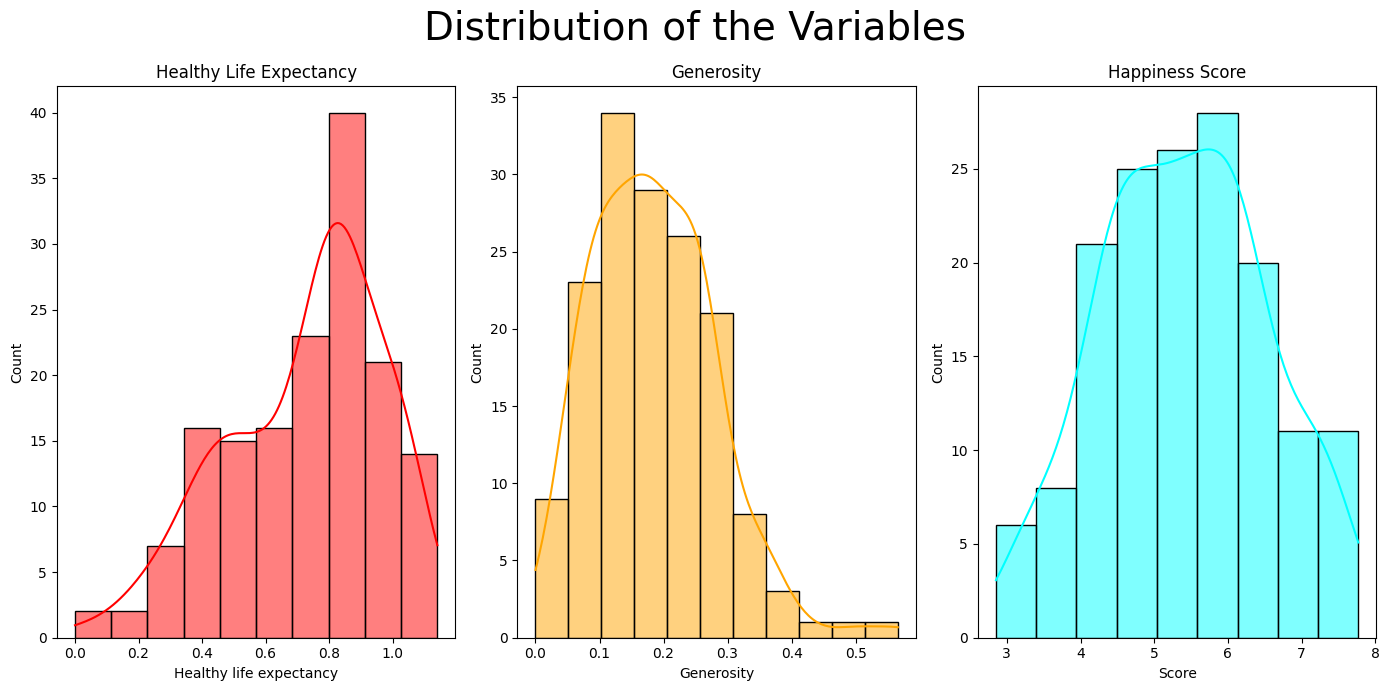

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14, 7))

# Esperança de vida saudável
sns.histplot(df['Healthy life expectancy'], kde=True, color='r', ax=ax1)
ax1.set_title('Healthy Life Expectancy')

# Generosidade
sns.histplot(df['Generosity'], kde=True, color='orange', ax=ax2)
ax2.set_title('Generosity')

# 'Score'
sns.histplot(df['Score'], kde=True, color='cyan', ax=ax3)
ax3.set_title('Happiness Score')

fig.suptitle("Distribution of the Variables", fontsize=28)

plt.tight_layout()
plt.show()

Entre as distribuições analisadas, a do "Score" (pontuação de felicidade) é a mais próxima de uma distribuição Gaussiana.

#### **Outliers**

Referencia: [outliers-e-como-trata-los-em-uma-analise-de-dados](https://aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/?authuser=1)

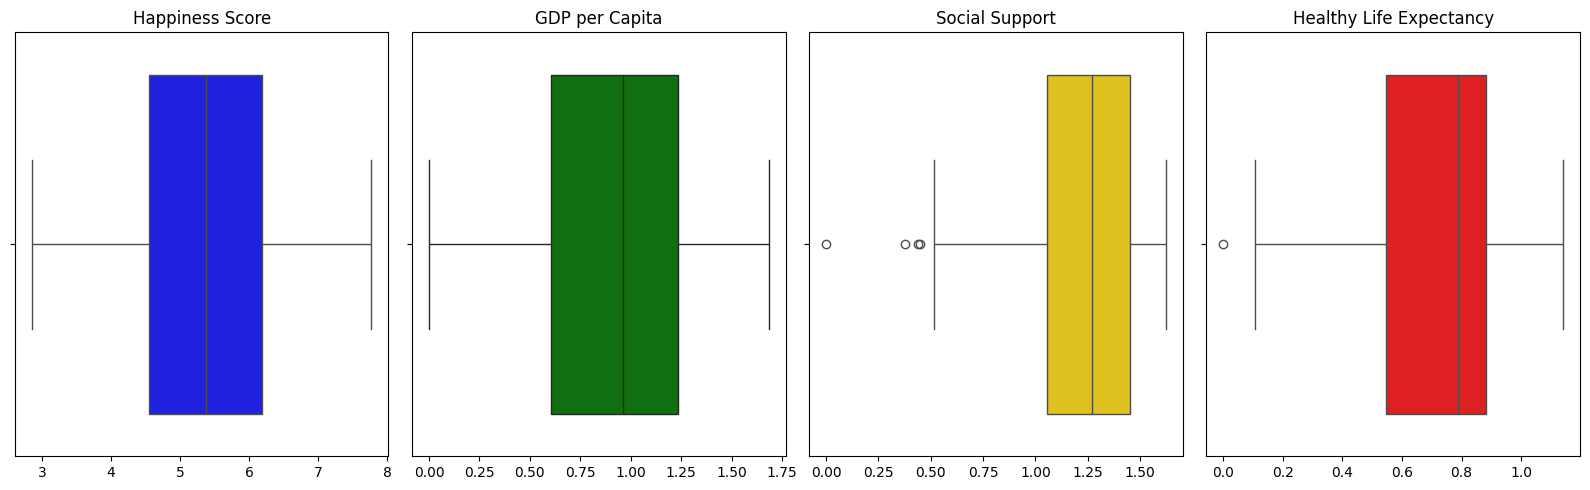

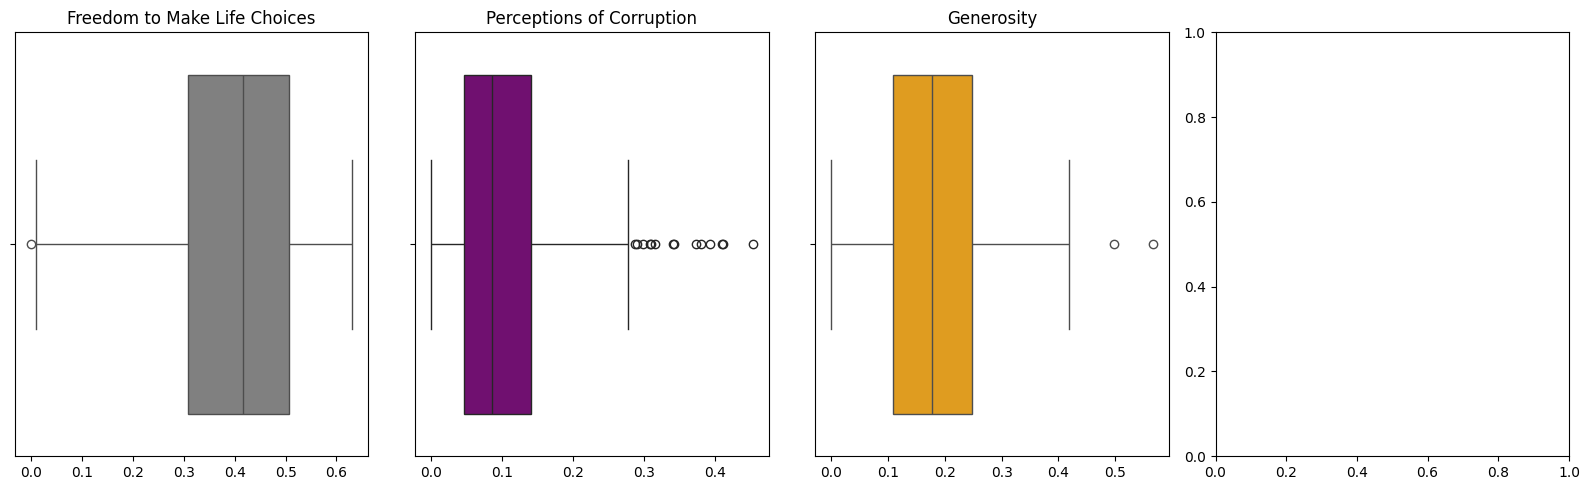

In [14]:
# Primeira linha de boxplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(x=df['Score'], ax=axes[0], color='blue')
axes[0].set_title('Happiness Score')
axes[0].set_xlabel('')

sns.boxplot(x=df['GDP per capita'], ax=axes[1], color='green')
axes[1].set_title('GDP per Capita')
axes[1].set_xlabel('')

sns.boxplot(x=df['Social support'], ax=axes[2], color='gold')
axes[2].set_title('Social Support')
axes[2].set_xlabel('')

sns.boxplot(x=df['Healthy life expectancy'], ax=axes[3], color='red')
axes[3].set_title('Healthy Life Expectancy')
axes[3].set_xlabel('')

plt.tight_layout()
plt.show()

# Segunda linha de boxplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(x=df['Freedom to make life choices'], ax=axes[0], color='grey')
axes[0].set_title('Freedom to Make Life Choices')
axes[0].set_xlabel('')

sns.boxplot(x=df['Perceptions of corruption'], ax=axes[1], color='purple')
axes[1].set_title('Perceptions of Corruption')
axes[1].set_xlabel('')

sns.boxplot(x=df['Generosity'], ax=axes[2], color='orange')
axes[2].set_title('Generosity')
axes[2].set_xlabel('')

plt.tight_layout()
plt.show()

- A análise dos boxplots revelou a presença de outliers em algumas variáveis relevantes. Por exemplo, a variável Social support apresenta outliers no extremo esquerdo, indicando que há países com níveis de suporte social significativamente abaixo da média global. Por outro lado, a variável Perceptions of corruption mostra outliers no extremo direito, sugerindo que a confiança nas instituições públicas é uma característica rara e que os países com baixa percepção de corrupção são exceções no cenário global. A variável Generosity segue padrão semelhante, onde poucos países demonstram níveis excepcionalmente altos de generosidade.

In [17]:
# Seleciona apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[np.number])
# Calcula o escore Z
z_scores = np.abs(stats.zscore(df_numerico))
# Define um limiar para considerar outliers (|Z| > 3 é o mais comum)
limiar = 3

# Cria um DataFrame booleano indicando onde estão os outliers
outliers = (z_scores > limiar)

# Exibe a quantidade de outliers por coluna
outliers_por_coluna = outliers.sum()
print("Quantidade de outliers por variável:")
print(outliers_por_coluna)

# Se quiser ver as linhas com pelo menos um outlier:
df_outliers = df[outliers.any(axis=1)]
print("\nObservações com pelo menos um outlier:")
df_outliers

Quantidade de outliers por variável:
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      2
Perceptions of corruption       3
dtype: int64

Observações com pelo menos um outlier:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


- A aplicação do método do escore Z permitiu identificar países que se destacam de forma significativa nos dados. Por exemplo, Dinamarca e Singapura se destacam positivamente em indicadores como PIB per capita e suporte social. Em contrapartida, países como República Centro-Africana e Suazilândia apresentam indicadores alarmantemente baixos em várias dimensões do bem-estar. Além disso, o caso de Myanmar chama atenção pelo seu valor extremamente elevado de generosidade, o que o torna uma exceção estatística interessante.